In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import datetime
from iautils import cascade

from datetime import datetime
from astropy.coordinates import SkyCoord

sys.path.insert(0, os.path.abspath('beam-model'))
from beam_model import utils, formed

%matplotlib inline

In [2]:
files = np.load("/arc/projects/chime_frb/mseth/Crab_Filepaths_1.npz")
crab_norescaled_filepaths = files['filepath']

In [3]:
test = crab_norescaled_filepaths[0]

test_obj = cascade.load_cascade_from_file(test)
test_obj.dm = 56.7 


Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
Preprocessing...
using L1 weights
De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..



/opt/pysetup/.venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Padding shifted channels using median value..

De-dispersing to 56.7 pc cm-3..
Using 400.1953125 MHz as reference..
Pad

Subbanding to 256 subbands (in frequency)..
Combining channels using a sub-DM of 56.7 pc cm-3..
Padding shifted channels using 0 value..



/arc/home/adamdong/Intensity-Analysis-Utils/iautils/spectra.py:579: RuntimeWarning: Mean of empty slice
  sub_nan = np.nanmean(


updating frequency channel information for beam after subbanding...
Subbanding to 256 subbands (in frequency)..
Combining channels using a sub-DM of 56.7 pc cm-3..
Padding shifted channels using 0 value..

updating frequency channel information for beam after subbanding...
Subbanding to 256 subbands (in frequency)..
Combining channels using a sub-DM of 56.7 pc cm-3..
Padding shifted channels using 0 value..

updating frequency channel information for beam after subbanding...
Subbanding to 256 subbands (in frequency)..
Combining channels using a sub-DM of 56.7 pc cm-3..
Padding shifted channels using 0 value..

updating frequency channel information for beam after subbanding...
Subbanding to 256 subbands (in frequency)..
Combining channels using a sub-DM of 56.7 pc cm-3..
Padding shifted channels using 0 value..

updating frequency channel information for beam after subbanding...
Subbanding to 256 subbands (in frequency)..
Combining channels using a sub-DM of 56.7 pc cm-3..
Padding shif

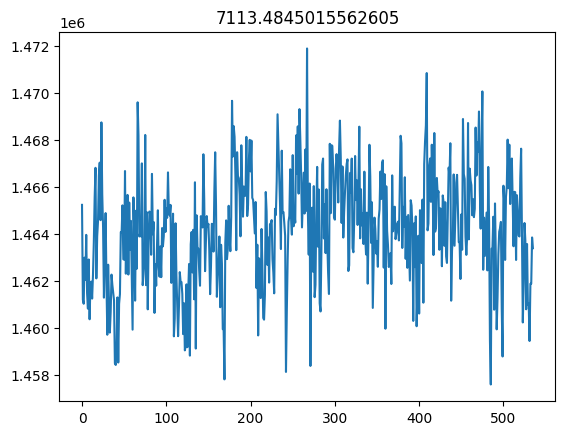

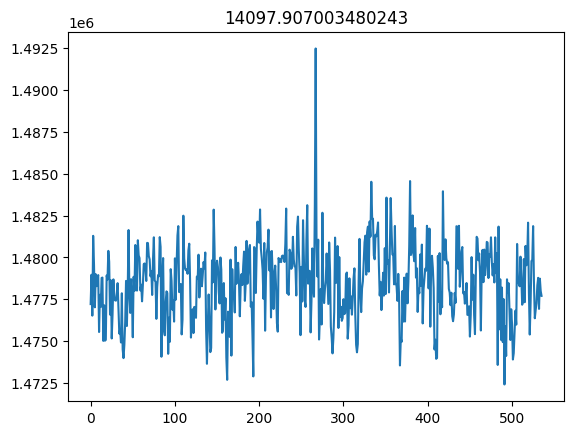

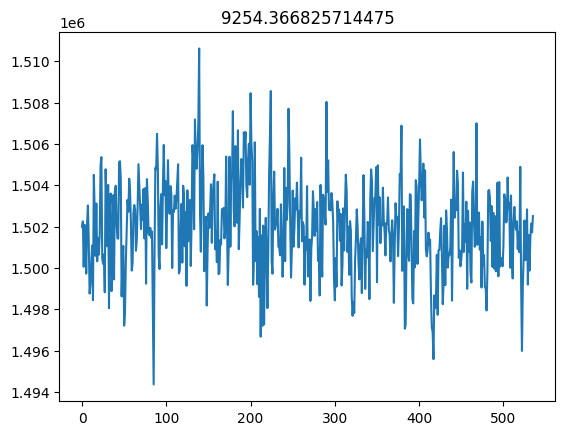

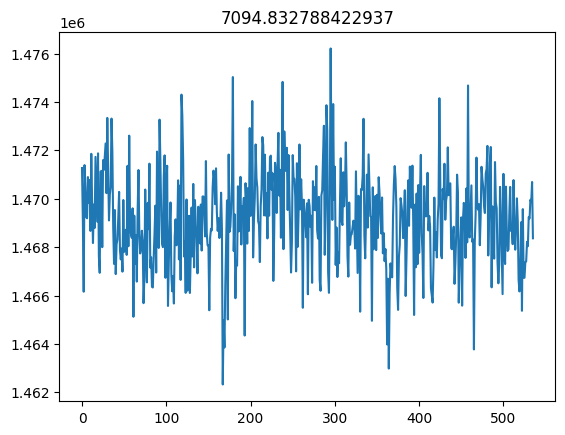

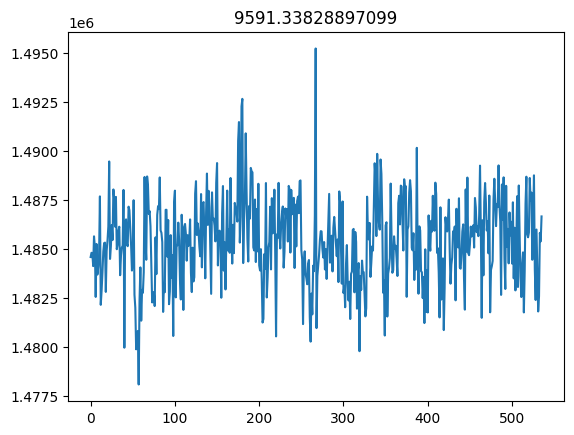

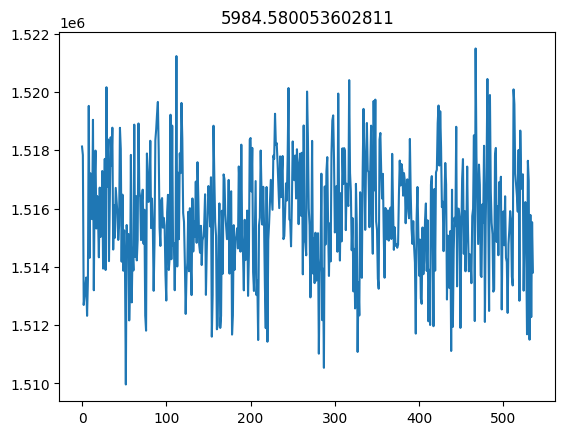

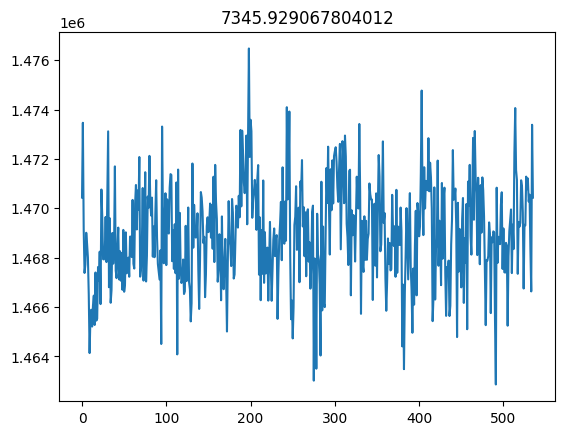

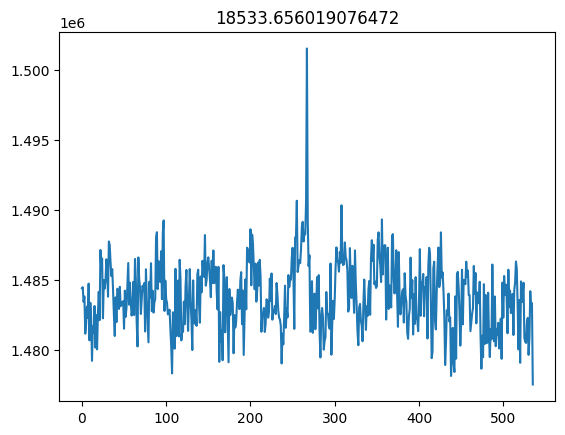

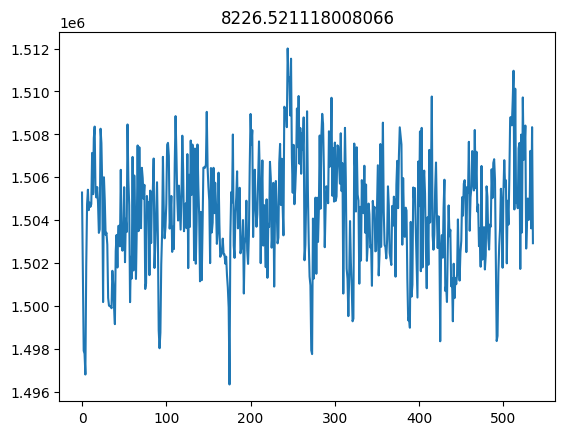

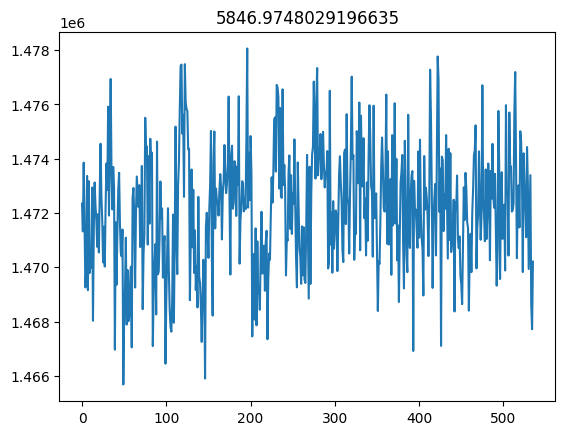

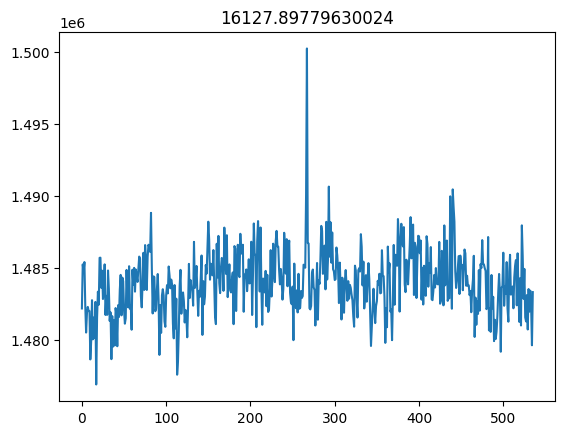

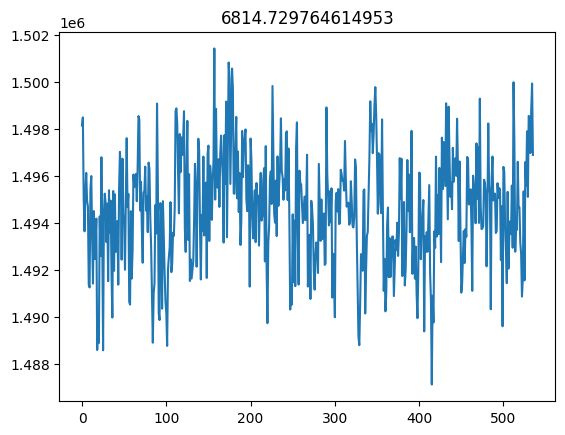

In [4]:
# Find index of max beam
peaks = []
for beam in test_obj.beams:
    beam.subband(256,56.7,apply_weights=False)
    mean_ts = np.nanmean(beam.intensity, axis=0)
    mean_ts_masked = mean_ts[400:500]
    offpeak_mean = np.nanmean(mean_ts_masked)
    
    subtracted_ts = mean_ts - offpeak_mean
    
    peak = np.max(subtracted_ts)
    
    plt.figure()
    plt.plot(mean_ts)
    plt.title(f"{peak}")
    
    peaks.append(peak) 

max_beam_idx = np.argmax(peaks)

Text(0.5, 1.0, 'example dynamic spectrum')

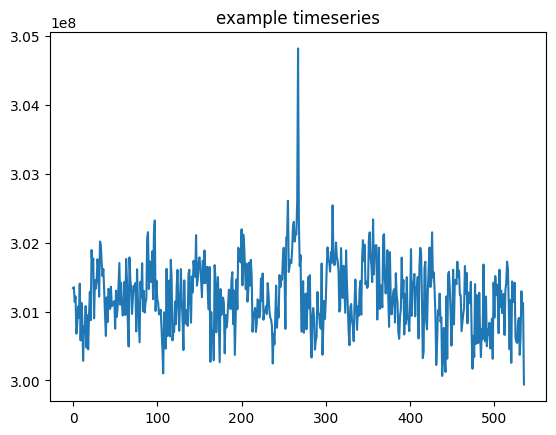

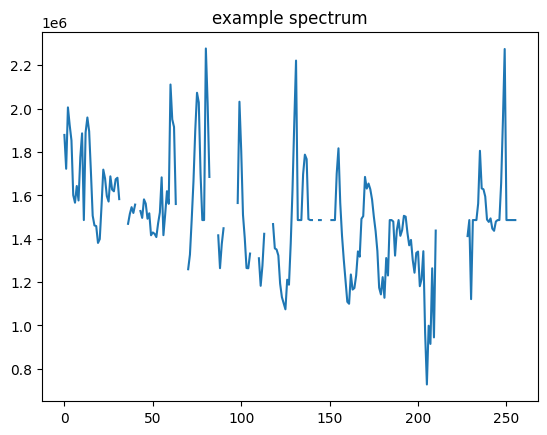

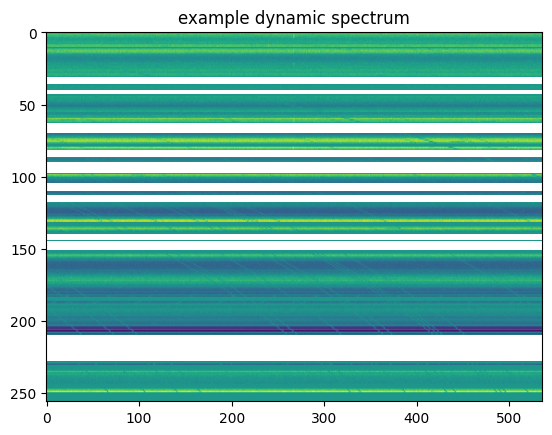

In [5]:
max_beam = test_obj.beams[max_beam_idx]
ts = np.nansum(max_beam.intensity, axis=0)
max_tidx = np.argmax(ts)
max_timestamp = test_obj.event_time 
spectra_peak = max_beam.intensity[:, max_tidx]
beam_id = int(beam.beam_no)

plt.figure()
plt.plot(ts)
plt.title("example timeseries")

plt.figure()
plt.plot(spectra_peak)
plt.title("example spectrum")

plt.figure()
plt.imshow(max_beam.intensity, aspect='auto')
plt.title("example dynamic spectrum")

In [6]:
max_beam.intensity.shape

(256, 536)

(256,)


/opt/pysetup/.venv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_1215556/3711682733.py:5: RuntimeWarning: invalid value encountered in divide
  intensity /= np.nanstd(intensity,axis=1)[:,np.newaxis]


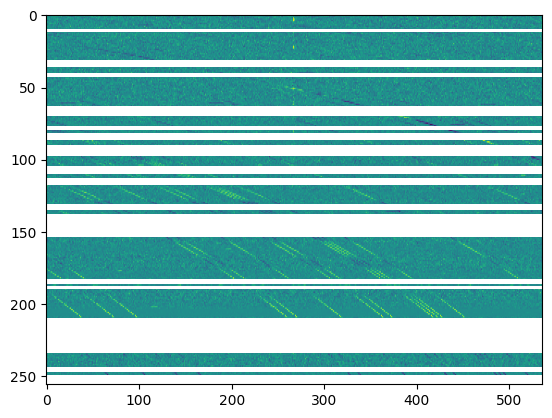

In [13]:
import copy
intensity = copy.deepcopy(max_beam.intensity)
print(np.nanmedian(intensity,axis=1).shape)
intensity -= np.nanmedian(intensity,axis=1)[:,np.newaxis]
intensity /= np.nanstd(intensity,axis=1)[:,np.newaxis]

plt.imshow(intensity,aspect="auto")